In [1]:
import numpy as np

# reproducibility
np.random.seed(10)

# generate data
babies = range(10)
months = np.arange(13)
data = [(month, np.dot(month, 24.7) + 96 + np.random.normal(loc=0, scale=20))
        for month in months
        for baby in babies]
month_data = [element[0] for element in data]
weight_data = [element[1] for element in data]

In [2]:
X = np.array(month_data)
X = np.c_[np.ones(X.shape[0]), X] # little trick to add vector of 1's
y = np.array(weight_data)

In [3]:
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares.'''
    xtx = np.dot(X.T, X) ## x-transpose times x
    inv_xtx = np.linalg.inv(xtx) ## inverse of x-transpose times x
    xty = np.dot(X.T, y) ## x-transpose times y
    return np.dot(inv_xtx, xty)

In [4]:
# find parameters
params = ols(X,y)
print('intercept: {} | slope: {}'.format(params[0], params[1]))

intercept: 97.94349022705876 | slope: 24.68016506543873


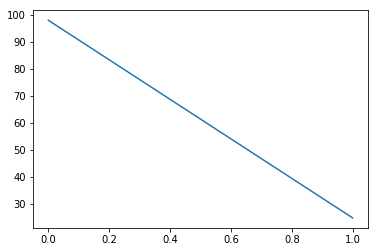

In [11]:
import matplotlib.pyplot as plt
plt.plot(params)
plt.show()

In [5]:
gender = np.random.binomial(n=1, p=0.5, size=len(babies)*len(months)) ## male=0, female=1
X = np.c_[X, gender]

In [6]:
multivariate_params = ols(X,y)
print(multivariate_params)

[95.46395681 24.63320421  5.6979177 ]


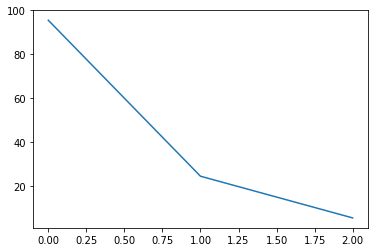

In [12]:
plt.plot(multivariate_params)
plt.show()